In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)

In [4]:
x = pd.read_excel("geo.xlsx", index_col=0)
# Приходится уменьшать выборку для алгоримов AffinityPropagation и AgglomerativeClustering, иначе не хватает памяти
x_mini = x.head(np.floor(x.shape[0] * 0.05).astype(int))
x = np.array(x)

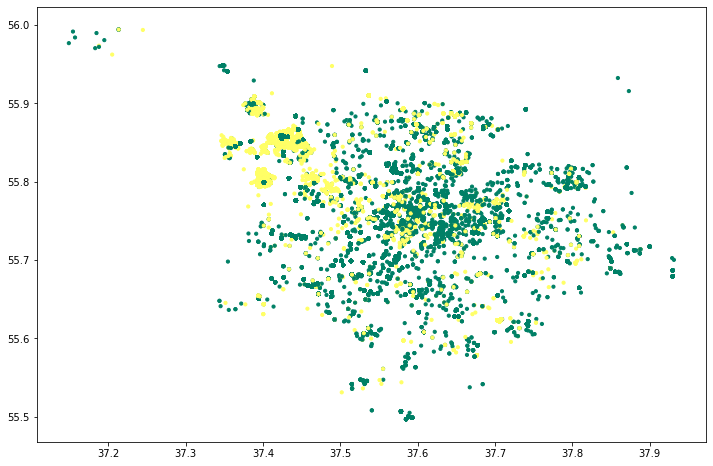

In [5]:
plt.scatter(x[:, 0], x[:, 1], c= x[:, 2], cmap='summer', s=10)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X_scaled = scaler.fit_transform(x[:, :2])

In [9]:
x_mini = np.array(x_mini)
X_scaled_A = scaler.fit_transform(x_mini[:, :2]) #Масштабирование данных для урезанной выборки

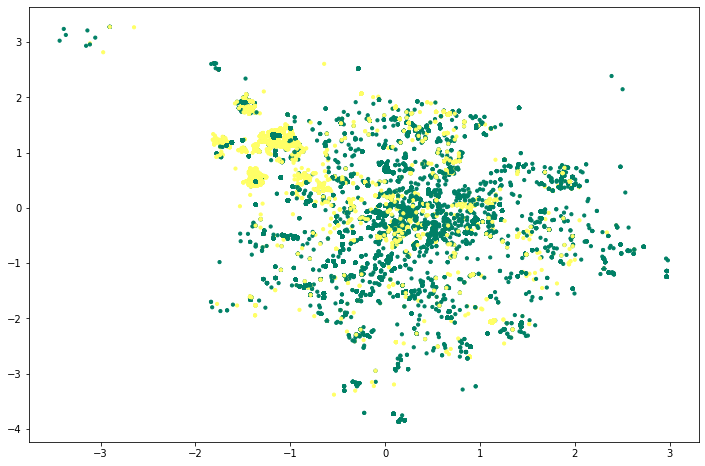

In [10]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c= x[:, 2], cmap='summer', s=10)

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn import metrics

## K_Means

In [12]:
kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit_predict(X_scaled)

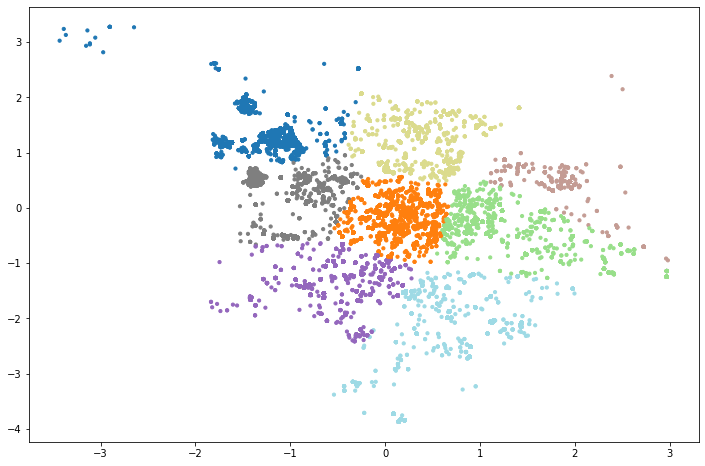

In [13]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c= clusters, cmap='tab20', s=10)

In [14]:
metrics.silhouette_score(X_scaled[:,:2],kmeans.labels_)

0.5750670644750969

## AffinityPropagation

In [15]:
Aff = AffinityPropagation()
clusters = Aff.fit_predict(X_scaled_A)

C:\Users\orudkovskaya\AppData\Local\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


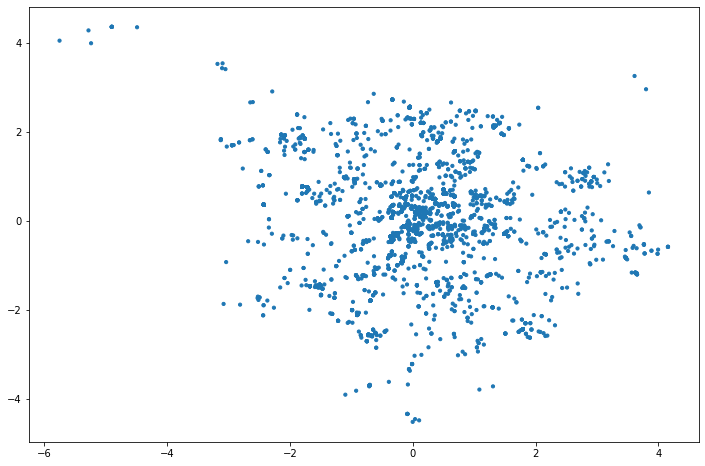

In [16]:
plt.scatter(X_scaled_A[:, 0], X_scaled_A[:, 1], c= clusters, cmap='tab20', s=10)

## AgglomerativeClustering

In [17]:
Aggl = AgglomerativeClustering(n_clusters=8)
clusters = Aggl.fit_predict(X_scaled_A)

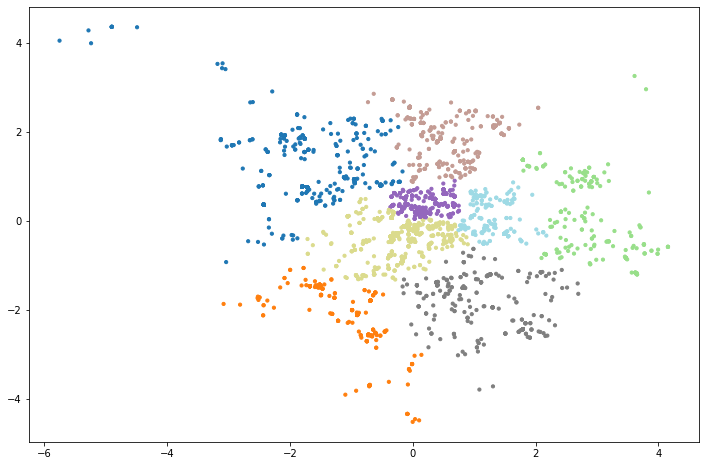

In [18]:
plt.scatter(X_scaled_A[:, 0], X_scaled_A[:, 1], c= clusters, cmap='tab20', s=10)

In [19]:
metrics.silhouette_score(X_scaled_A[:,:2],Aggl.labels_)

0.43732182315176127

# Определяем количество кластеров
Ищем количество округов в Москве

In [20]:
k_inertia = []
ks = range(1,16)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

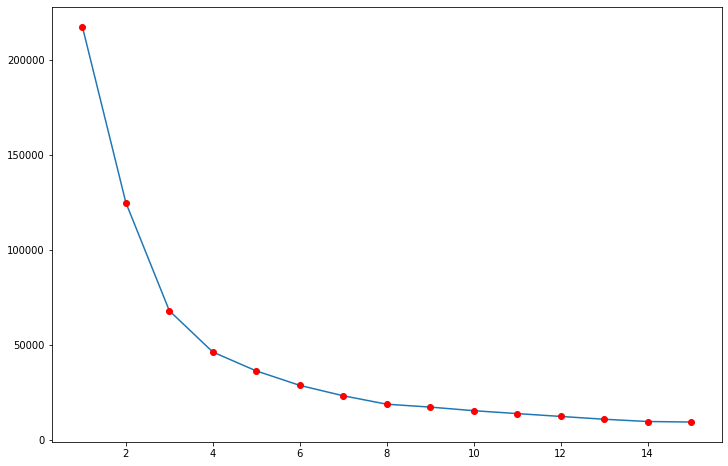

In [21]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [22]:
diff = np.diff(k_inertia)

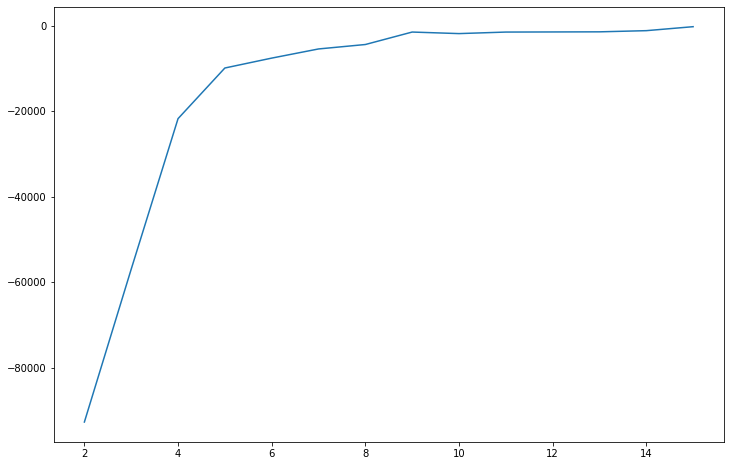

In [23]:
plt.plot(ks[1:], diff)

In [24]:
diff_r = diff[1:] / diff[:-1]

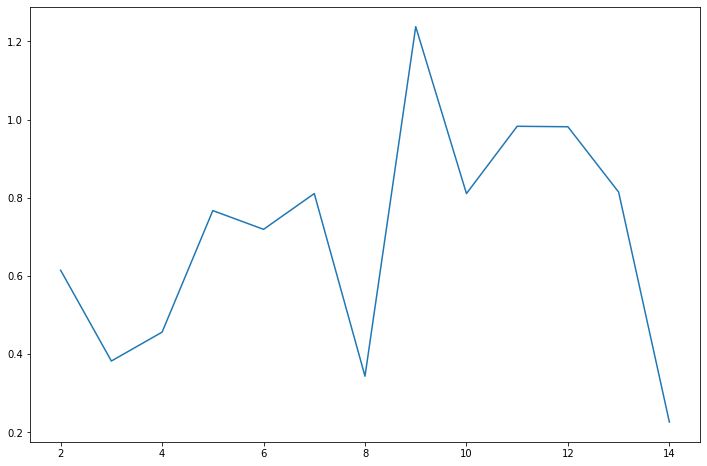

In [25]:
plt.plot(ks[1:-1], diff_r)

In [26]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

14

# Кластеризация с фильтром относительно за/против

In [27]:
x_yes = x[x[:,2] == 1]

In [28]:
x_no = x[x[:,2] == -1]

In [29]:
X_scaled_yes = scaler.fit_transform(x_yes[:, :2])

In [30]:
X_scaled_no = scaler.fit_transform(x_no[:, :2])

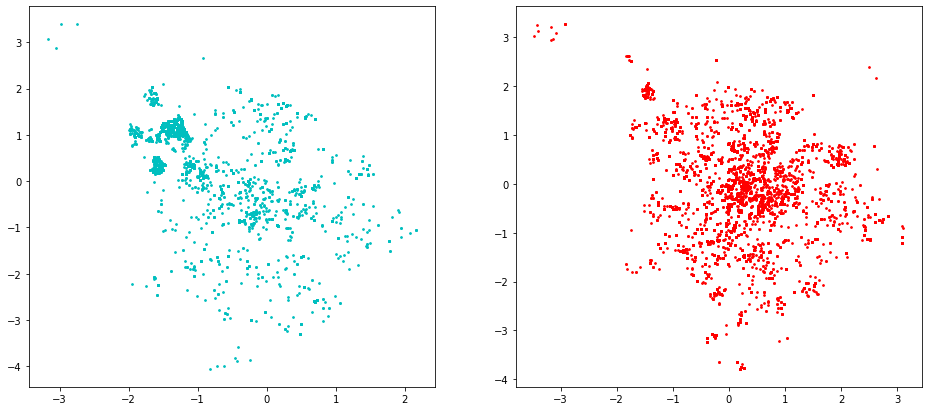

In [31]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(16, 7)
)
ax1.scatter(X_scaled_yes[:, 0], X_scaled_yes[:, 1], s=3, c = 'c')
ax2.scatter(X_scaled_no[:, 0], X_scaled_no[:, 1], s=3, c = 'r')


In [32]:
clusters_yes = KMeans(n_clusters=12).fit_predict(X_scaled_yes)
clusters_no = KMeans(n_clusters=12).fit_predict(X_scaled_no)

Ellipsis

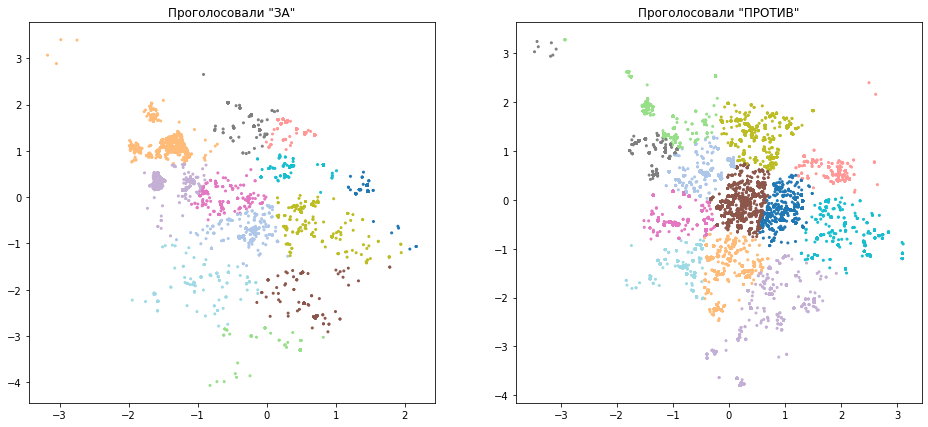

In [33]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(16, 7)
)
ax1.scatter(X_scaled_yes[:, 0], X_scaled_yes[:, 1], s=4, c= clusters_yes, cmap='tab20')
ax2.scatter(X_scaled_no[:, 0], X_scaled_no[:, 1], s=4, c= clusters_no, cmap='tab20')
ax1.set_title('Проголосовали "ЗА"')
ax2.set_title('Проголосовали "ПРОТИВ"')
...

# Наиболее активные в голосовании районы

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)

In [35]:
dbscan = DBSCAN(eps = 0.14, min_samples = 300)
clusters = dbscan.fit_predict(X_scaled)

In [36]:
labels = dbscan.labels_
action = labels != -1 #отмечаю большие скопления голосующих
discharge = labels == -1 #отмечаю выбросы

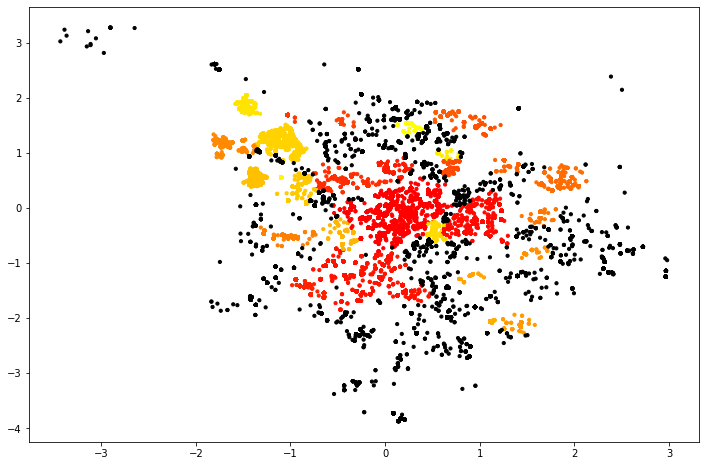

In [37]:
plt.scatter(X_scaled[action, 0], X_scaled[action, 1], c= clusters[action], cmap='autumn', s=10)
plt.scatter(X_scaled[discharge, 0], X_scaled[discharge, 1], c= clusters[discharge], cmap='gray', s=10)

In [38]:
metrics.silhouette_score(X_scaled[:,:2],dbscan.labels_)

0.5319885542422865